In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data=pd.read_csv(r'F:\Kaggle Data Sets\AnalyticsVidya-LoanApproval\train.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
train_data.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
print(train_data['Gender'].value_counts())
maxm=max(train_data['Gender'].value_counts())
print(maxm)


Male      489
Female    112
Name: Gender, dtype: int64
489


In [13]:
train_data['Gender'].fillna('Male',inplace=True)

In [14]:
print(train_data['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [15]:
train_data['Married'].fillna('Yes',inplace=True)

In [16]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train_data['Gender'].nunique()

2

In [19]:
print(train_data['Dependents'].value_counts())
print(train_data['Dependents'].nunique())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
4


In [21]:
train_data['Dependents'].fillna('0',inplace=True)
print(train_data['Dependents'].nunique())

4


In [22]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train_data['Self_Employed'].fillna('No',inplace=True)

In [25]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [26]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train_data['Loan_Amount_Term'].fillna(360,inplace=True)

In [28]:
train_data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
train_data['Credit_History'].fillna(1.0,inplace=True)

In [31]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [34]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [35]:
train_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [141]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Gender']=le.fit_transform(train_data['Gender'])
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Dependents']=le.fit_transform(train_data['Dependents'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])

In [37]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
train_data.shape

(614, 13)

In [39]:
train_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

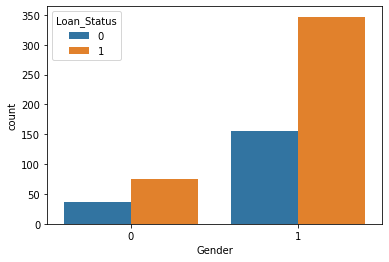

In [40]:
sns.countplot(train_data['Gender'],hue='Loan_Status',data=train_data)

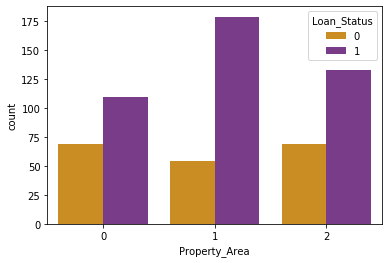

In [41]:
cat_list=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

sns.countplot('Property_Area',hue='Loan_Status',data=train_data,palette='CMRmap_r')

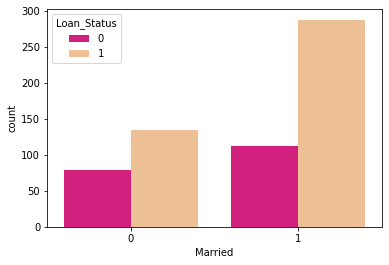

In [42]:
sns.countplot('Married',hue='Loan_Status',data=train_data,palette='Accent_r')


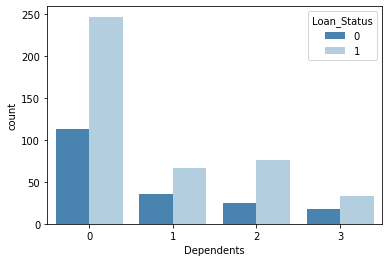

In [43]:
sns.countplot('Dependents',hue='Loan_Status',data=train_data,palette='Blues_r')


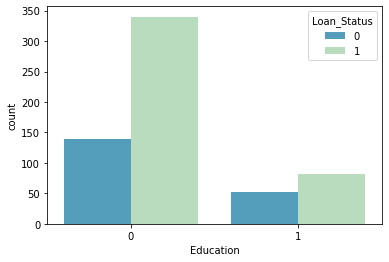

In [44]:
sns.countplot('Education',hue='Loan_Status',data=train_data,palette='GnBu_r')


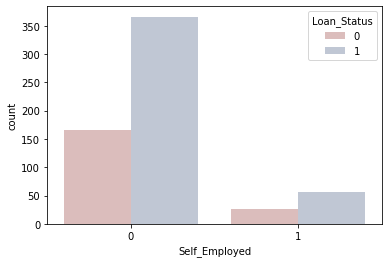

In [45]:
sns.countplot('Self_Employed',hue='Loan_Status',data=train_data,palette='vlag_r')


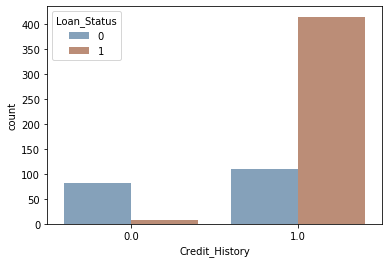

In [46]:
sns.countplot('Credit_History',hue='Loan_Status',data=train_data,palette='twilight_shifted')

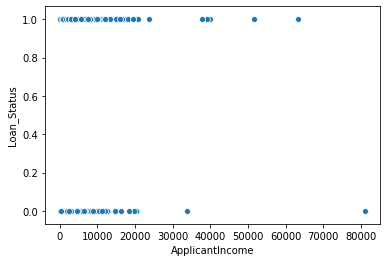

In [47]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=train_data)

-------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.30      0.39        20
           1       0.73      0.88      0.80        42

    accuracy                           0.69        62
   macro avg       0.64      0.59      0.59        62
weighted avg       0.67      0.69      0.66        62

-------------------------------------------------------------------------------
0.6935483870967742


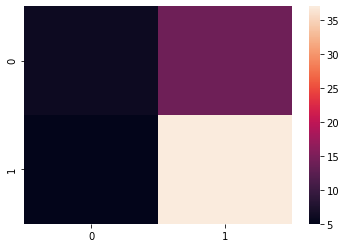

In [48]:
X=train_data.drop(['Loan_Status','Loan_ID'],axis=1)
y=train_data['Loan_Status']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

sns.heatmap(confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------')
print(classification_report(y_test,y_pred))
print('-------------------------------------------------------------------------------')
print(accuracy_score(y_test,y_pred))


In [49]:
cols=train_data.drop(['Loan_Status','Loan_ID'],axis=1).columns.tolist()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(train_data.drop(['Loan_Status','Loan_ID'],axis=1))

scaled_features=scaler.transform(train_data.drop(['Loan_Status','Loan_ID'],axis=1))

X_knn=pd.DataFrame(scaled_features,columns=cols)

In [108]:
X_knn.head()
X_knn.shape
y_knn.shape

(614,)

In [51]:
X_knn.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
dtype: int64

In [52]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [53]:
y_knn=train_data['Loan_Status']

In [54]:
X_knn_train,X_knn_test,y_knn_train,y_knn_test=train_test_split(X_knn,y_knn,test_size=0.1,random_state=1)

1


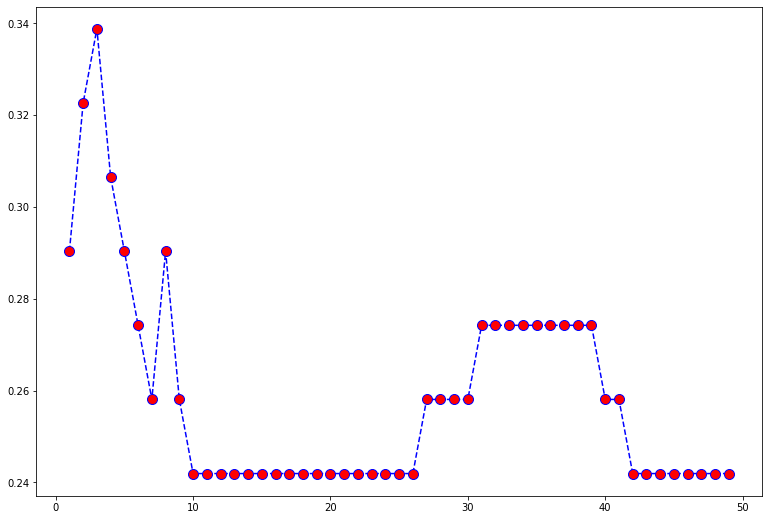

In [55]:
from sklearn.neighbors import KNeighborsClassifier
error=list()
min=51
for i in range(1,50):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_knn_train,y_knn_train)
    y_pred_i=knn_i.predict(X_knn_test)
    if i<=min:
        min=i
    error.append(np.mean(y_pred_i!=y_test))

plt.figure(figsize=(13,9))
plt.plot(range(1,50),error,linestyle='dashed',color='blue',marker='o',markerfacecolor='red',markersize=10)
print(min)

In [56]:
knn_10=KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_knn_train,y_knn_train)
y_pred=knn_10.predict(X_knn_test)
print(confusion_matrix(y_knn_test,y_pred))
print(classification_report(y_knn_test,y_pred))

[[ 7 13]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.78      0.35      0.48        20
           1       0.75      0.95      0.84        42

    accuracy                           0.76        62
   macro avg       0.77      0.65      0.66        62
weighted avg       0.76      0.76      0.73        62



In [57]:
print(accuracy_score(y_knn_test,y_pred))

0.7580645161290323


In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))

0.7258064516129032


F:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
X_train=X_knn
y_train=y_knn
print(X_train[:3])
print(y_train[:3])

     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.472343 -1.372089   -0.737806  -0.528362      -0.392601         0.072991   
1  0.472343  0.728816    0.253470  -0.528362      -0.392601        -0.134412   
2  0.472343  0.728816   -0.737806  -0.528362       2.547117        -0.393747   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487    0.000000          0.273231        0.411733   
1          -0.038732   -0.219273          0.273231        0.411733   
2          -0.554487   -0.957641          0.273231        0.411733   

   Property_Area  
0       1.223298  
1      -1.318513  
2       1.223298  
0    1
1    0
2    1
Name: Loan_Status, dtype: int32


In [113]:
test_data=pd.read_csv(r'F:\Kaggle Data Sets\AnalyticsVidya-LoanApproval\test.csv')

In [114]:
test_data.shape

(367, 12)

In [115]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [116]:
print(test_data.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [117]:
test_data.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [118]:
test_data['Gender'].fillna('Male',inplace=True)

In [119]:
test_data['Dependents'].value_counts()
print(test_data['Dependents'].nunique())

4


In [120]:
test_data['Dependents'].fillna('0',inplace=True)
print(test_data['Dependents'].nunique())

4


In [121]:
test_data['Married'].fillna('Yes',inplace=True)

In [122]:
test_data['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [123]:
test_data['Self_Employed'].fillna('No',inplace=True)


In [124]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [125]:
test_data.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [126]:
test_data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [127]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)

In [128]:
test_data['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [129]:
test_data['Credit_History'].fillna(1.0,inplace=True)

In [130]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Gender']=le.fit_transform(test_data['Gender'])
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Dependents']=le.fit_transform(test_data['Dependents'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])


In [131]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [132]:
test_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [133]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [134]:
X_train=train_data.drop(['Loan_ID','Loan_Status'],axis=1)
y_train=train_data['Loan_Status']

In [135]:
print('Train data->',X_train.shape)
print('Test data->',X_test.shape)
print('Target train data->',y_train.shape)

Train data-> (614, 11)
Test data-> (367, 11)
Target train data-> (614,)


In [136]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [139]:
X_test=test_data.drop(['Loan_ID'],axis=1)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [140]:
knn_12=KNeighborsClassifier(n_neighbors=12)
knn_12.fit(X_train,y_train)
y_pred=knn_12.predict(X_test)

In [142]:
import csv
fields=['Loan_ID','Loan_Status']
row=list()
for i in test_data.index:
    row_i=[test_data.loc[i,'Loan_ID'],y_pred[i]]
    row.append(row_i)
    
row=np.array(row)
filename='output.csv'
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(row) 

In [146]:
len(y_pred[y_pred==0])

45